In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# leer el archivo center.txt
df = pd.read_csv('center.txt', sep=" ", header=None)

In [3]:
# asignar nombres a las columnas, x, y
df.columns = ["x", "y"]

In [4]:
# De la columna x tiene la estructa '(55,' y queremos tener solo el número
df['x'] = df['x'].str.replace('(', '')
df['y'] = df['y'].str.replace(')', '')
df['x'] = df['x'].str.replace(',', '')
df

,x,y
0,1669,368
1,1665,369
2,1660,370
3,1656,371
4,1648,374
...,...,...
188,64,644
189,60,646
190,55,648
191,47,644


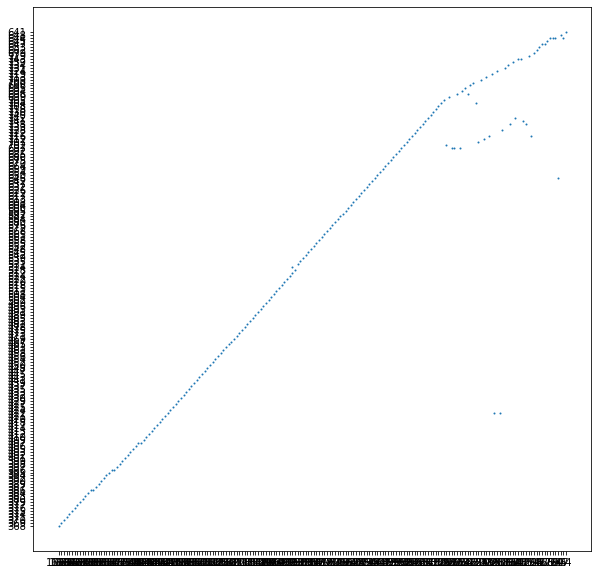

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], s=1)
plt.show()

In [6]:
df

,x,y
0,1669,368
1,1665,369
2,1660,370
3,1656,371
4,1648,374
...,...,...
188,64,644
189,60,646
190,55,648
191,47,644


In [7]:
# cambiamos el formato de las columnas a float
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)


Coefficients: 
 [[-0.22085729]]
Mean squared error: 847.84
Coefficient of determination: 0.95


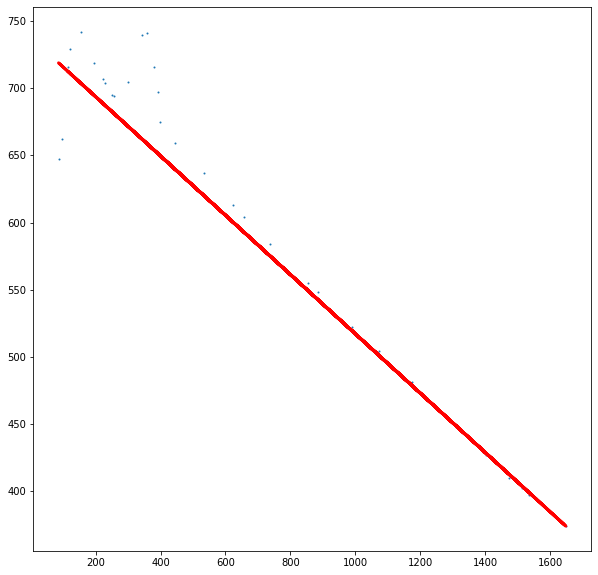

In [8]:
# Creacion de un modelo de regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(df['x'], df['y'], test_size=0.2, random_state=0)

# Crear el objeto de Regresión Lineal
regr = LinearRegression()

# Entrenar el modelo usando los conjuntos de entrenamiento
regr.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Hacer predicciones usando el conjunto de prueba
y_pred = regr.predict(X_test.values.reshape(-1, 1))

# Los coeficientes
print('Coefficients: \n', regr.coef_)
# El error cuadrático medio
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# El coeficiente de determinación: 1 es una predicción perfecta
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Graficar
plt.figure(figsize=(10, 10))
plt.scatter(X_test, y_test, s=1)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.show()




In [9]:
#  mostrar el modelo como ecuacion
print('y = ', regr.coef_, ' * x + ', regr.intercept_)

y =  [[-0.22085729]]  * x +  [737.94654122]


In [13]:
# dibujasmo la recta de regresion en la imagen 'primer_frame.jpg'
import cv2

# Ruta de la imagen a leer
image_path = 'primer_frame.jpg'

# Leer la imagen
image = cv2.imread(image_path)

# Dibujar la recta de regresion
cv2.line(image, (0, int(regr.intercept_)), (image.shape[1], int(regr.coef_ * image.shape[1] + regr.intercept_)), (0, 0, 255), 3)

# Dibujamos una linea de referencia
# cv2.line(image, (0, int(584.76)), (image.shape[1], int(-0.14511 * image.shape[1] + 581.502)), (0, 255, 0), 3)

#  Dibujamos puntos dentro de la linea de referencia, de manera que estos puntos se separne de manera cuadratica
# for i in range(0, image.shape[1], 10):
    # cv2.circle(image, (i, int(584.76 - 0.14511 * i)), 2, (255, 0, 0), -1)

# Dibujamos puntos dentro de la linea de regresion, de manera que estos puntos se separne 10 pixeles
for i in range(0, image.shape[1], 10):
    cv2.circle(image, (i, int(regr.intercept_ + regr.coef_ * i)), 2, (255, 0, 0), -1)

# Mostrar la imagen a una nueva escala
cv2.imshow('image', cv2.resize(image, (0, 0), fx=0.8, fy=0.8))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Guardar la imagen
# cv2.imwrite('primer_frame_linea.jpg', image)


In [17]:
# dibujasmo la recta de regresion en la imagen 'ultimo_frame.jpg'
import cv2

# Ruta de la imagen a leer
image_path = 'ultimo_frame.jpg'

# Leer la imagen
image = cv2.imread(image_path)

# Dibujar la recta de regresion
cv2.line(image, (0, int(regr.intercept_)), (image.shape[1], int(regr.coef_ * image.shape[1] + regr.intercept_)), (0, 0, 255), 3)

# Dibujamos una linea de referencia
cv2.line(image, (0, int(584.76)), (image.shape[1], int(-0.14511 * image.shape[1] + 581.502)), (0, 255, 0), 3)

#  Dibujamos puntos dentro de la linea de referencia, de manera que estos puntos se separne de manera cuadratica
# for i in range(0, image.shape[1], 10):
    # cv2.circle(image, (i, int(584.76 - 0.14511 * i)), 2, (255, 0, 0), -1)

# Dibujamos puntos dentro de la linea de regresion, de manera que estos puntos se separne 10 pixeles
for i in range(0, image.shape[1], 10):
    cv2.circle(image, (i, int(regr.intercept_ + regr.coef_ * i)), 2, (255, 0, 0), -1)

# Mostrar la imagen a una nueva escala
cv2.imshow('image', cv2.resize(image, (0, 0), fx=0.8, fy=0.8))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Guardar la imagen
# cv2.imwrite('ultimo_frame_linea.jpg', image)
